In [2]:
# Basic modules
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
import pickle
import time

da_method = '3DVAR'                            # DA method, either '3DVAR', 'KF', or 'MLEF'
ml_file_str = 'w12_s1.28'
obs_vars = 'xyz'                            # Observed variables, either 'xy', or 'xyz'

with open('./data/ngDA_L63_' \
    +da_method+"_" \
    +obs_vars+"_" \
    +ml_file_str
    +'.pkl','rb') as f:
    RMSE_A = pickle.load(f)
    RMSE_B = pickle.load(f)
    MAE_A = pickle.load(f)
    MAE_B = pickle.load(f)
    MeAE_A = pickle.load(f)
    MeAE_B = pickle.load(f)
    info = pickle.load(f)
n_runs = info['n_runs']
meths = [ \
    'Gaussian ', \
    'Lognormal', \
    'Rev logn ', \
    'G-LogNorm', \
    'G-RevLog ', \
    'All mixed', \
    'noDA     ' \
]

RMSE: 
Gaussian : mean(r_a) = 1.185, mean(r_b) = 3.140, med(r_a) = 1.153, med(r_b) = 3.120
Lognormal: mean(r_a) = 5.707, mean(r_b) = 5.107, med(r_a) = 5.262, med(r_b) = 5.098
Rev logn : mean(r_a) = 7.768, mean(r_b) = 6.394, med(r_a) = 6.414, med(r_b) = 5.583
G-LogNorm: mean(r_a) = 2.336, mean(r_b) = 3.428, med(r_a) = 2.229, med(r_b) = 3.417
G-RevLog : mean(r_a) = 3.392, mean(r_b) = 3.928, med(r_a) = 2.351, med(r_b) = 3.477
All mixed: mean(r_a) = 4.284, mean(r_b) = 4.251, med(r_a) = 3.484, med(r_b) = 3.840
noDA     : mean(r_a) = 11.783, mean(r_b) = 11.877, med(r_a) = 11.790, med(r_b) = 11.941

MAE: 
Gaussian : mean(r_a) = 0.810, mean(r_b) = 1.509, med(r_a) = 0.805, med(r_b) = 1.490
Lognormal: mean(r_a) = 2.252, mean(r_b) = 2.898, med(r_a) = 2.248, med(r_b) = 2.873
Rev logn : mean(r_a) = 2.332, mean(r_b) = 2.987, med(r_a) = 2.267, med(r_b) = 2.910
G-LogNorm: mean(r_a) = 1.067, mean(r_b) = 1.740, med(r_a) = 1.069, med(r_b) = 1.713
G-RevLog : mean(r_a) = 0.989, mean(r_b) = 1.694, med(r_a) 

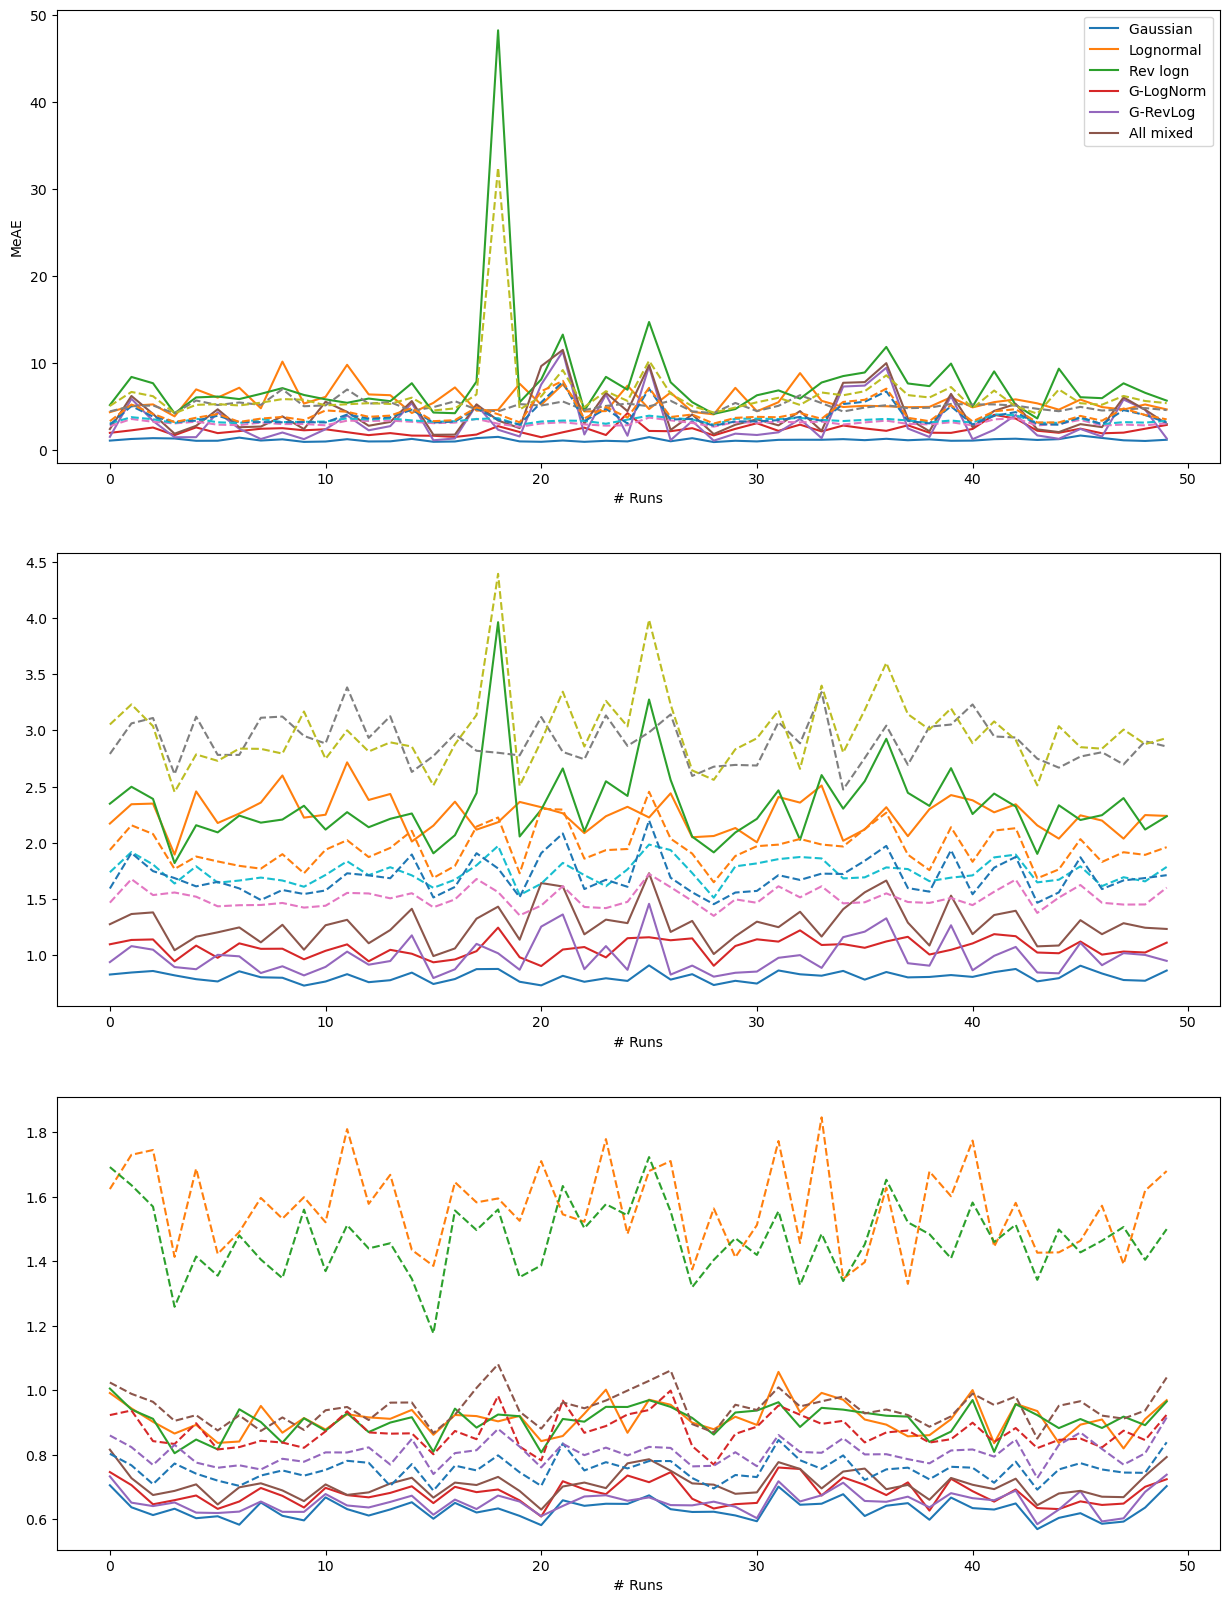

In [16]:

n_meths = 6

fig, ax = plt.subplots(3,1,figsize=(15, 20))
for iM in range(n_meths):
    ax[0].plot(range(n_runs),RMSE_A[:,iM],label=meths[iM])
    ax[1].plot(range(n_runs),MAE_A[:,iM])
    ax[2].plot(range(n_runs),MeAE_A[:,iM])
ax[0].legend()
plt.gca().set_prop_cycle(None)
for iM in range(n_meths):
    ax[0].plot(range(n_runs),RMSE_B[:,iM],'--')
    ax[1].plot(range(n_runs),MAE_B[:,iM],'--')
    ax[2].plot(range(n_runs),MeAE_B[:,iM],'--')
ax[0].set_ylabel("RMSE")
ax[0].set_ylabel("MAE")
ax[0].set_ylabel("MeAE")
for jj in range(3):
    ax[jj].set_xlabel("# Runs")

n_meths = 7
print("RMSE: ")
for iM in range(n_meths):
    r_a = np.mean(RMSE_A[:,iM])
    r_b = np.mean(RMSE_B[:,iM])
    m_a = np.median(RMSE_A[:,iM])
    m_b = np.median(RMSE_B[:,iM])

    print(meths[iM]+ \
        ': mean(r_a) = '+format(np.round(r_a,3),".3f")+ \
        ', mean(r_b) = '+format(np.round(r_b,3),".3f")+ \
        ', med(r_a) = '+format(np.round(m_a,3),".3f")+ \
        ', med(r_b) = '+format(np.round(m_b,3),".3f"))
print("")
print("MAE: ")
for iM in range(n_meths):
    r_a = np.mean(MAE_A[:,iM])
    r_b = np.mean(MAE_B[:,iM])
    m_a = np.median(MAE_A[:,iM])
    m_b = np.median(MAE_B[:,iM])

    print(meths[iM]+ \
        ': mean(r_a) = '+format(np.round(r_a,3),".3f")+ \
        ', mean(r_b) = '+format(np.round(r_b,3),".3f")+ \
        ', med(r_a) = '+format(np.round(m_a,3),".3f")+ \
        ', med(r_b) = '+format(np.round(m_b,3),".3f"))
print("")
print("MeAE: ")
for iM in range(n_meths):
    r_a = np.mean(MeAE_A[:,iM])
    r_b = np.mean(MeAE_B[:,iM])
    m_a = np.median(MeAE_A[:,iM])
    m_b = np.median(MeAE_B[:,iM])

    print(meths[iM]+ \
        ': mean(r_a) = '+format(np.round(r_a,3),".3f")+ \
        ', mean(r_b) = '+format(np.round(r_b,3),".3f")+ \
        ', med(r_a) = '+format(np.round(m_a,3),".3f")+ \
        ', med(r_b) = '+format(np.round(m_b,3),".3f"))
print("")

0.9981011781701715 1.0695108229312347


Text(0, 0.5, '$w$')

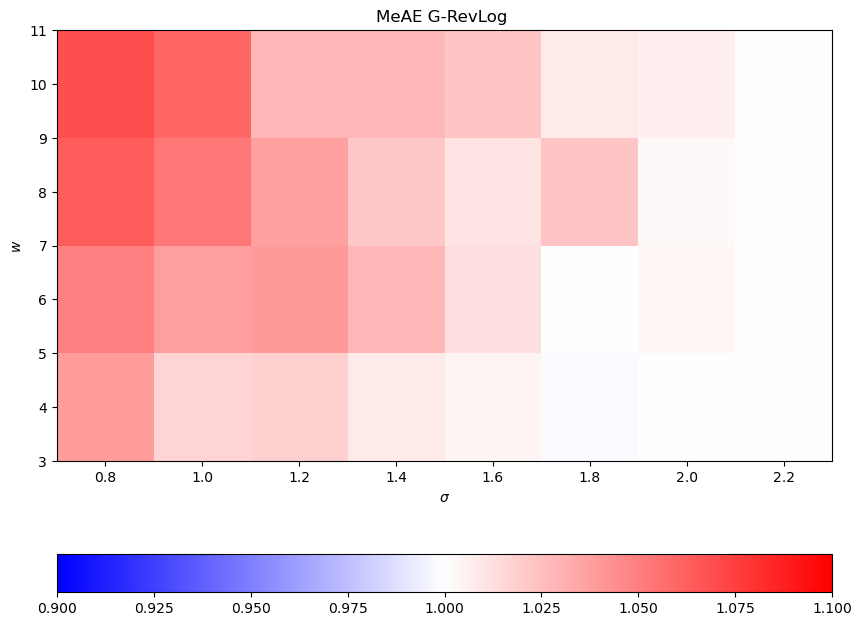

In [51]:

da_method = '3DVAR'                            # DA method, either '3DVAR', 'KF', or 'MLEF'
obs_vars = 'xyz'                            # Observed variables, either 'xy', or 'xyz'
n_meths = 7
meths = [ \
    'Gaussian ', \
    'Lognormal', \
    'Rev logn ', \
    'G-LogNorm', \
    'G-RevLog ', \
    'All mixed', \
    'noDA     ' \
]

er_stat = 'MeAE'
fn_stat = np.median

w_vec = np.arange(4,12,2)
s_vec = np.arange(0.8,2.4,0.2)

r_A = np.empty((w_vec.size,s_vec.size,n_meths))
r_B = np.empty((w_vec.size,s_vec.size,n_meths))

for ii, w in enumerate(w_vec):
    for jj, s_cutoff in enumerate(s_vec):
        ml_file_str =  'w'+str(w)+'_s'+str(np.round(s_cutoff,2))
        fName = './data/ngDA_L63_' +da_method+"_" +obs_vars+"_" +ml_file_str+'.pkl'

        with open('./data/ngDA_L63_' \
            +da_method+"_" \
            +obs_vars+"_" \
            +ml_file_str
            +'.pkl','rb') as f:
            RMSE_A = pickle.load(f)
            RMSE_B = pickle.load(f)
            MAE_A = pickle.load(f)
            MAE_B = pickle.load(f)
            MeAE_A = pickle.load(f)
            MeAE_B = pickle.load(f)
        
        if er_stat == 'RMSE':
            r_A[ii,jj,:] = fn_stat(RMSE_A, axis = 0)
            r_B[ii,jj,:] = fn_stat(RMSE_B, axis = 0)
        elif er_stat == 'MAE':
            r_A[ii,jj,:] = fn_stat(MAE_A, axis = 0)
            r_B[ii,jj,:] = fn_stat(MAE_B, axis = 0)
        elif er_stat == 'MeAE':
            r_A[ii,jj,:] = fn_stat(MeAE_A, axis = 0)
            r_B[ii,jj,:] = fn_stat(MeAE_B, axis = 0)
        else:
            print("er_stat not found.")

xx = np.arange(3,12,2)
yy = np.arange(0.7,2.4,0.2)

n_c = 4
print(np.min(r_A[:,:,n_c]/r_A[:,:,0]),np.max(r_A[:,:,n_c]/r_A[:,:,0]))
fig, ax = plt.subplots(1,1,figsize=(10, 8))
cq = ax.pcolormesh(yy,xx,r_A[:,:,n_c]/r_A[:,:,0], cmap=plt.cm.bwr,vmin = 0.9,vmax=1.1)
cb = plt.colorbar(cq,ax=ax, orientation = "horizontal")
ax.set_title(er_stat+" "+meths[n_c])
ax.set_xlabel("$\sigma$")
ax.set_ylabel("$w$")